# Clustering Crypto

In [6]:
pip install plotly==5.10.0

Note: you may need to restart the kernel to use updated packages.


In [51]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [8]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv('E:\module 18\crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [9]:
# Keep all the cryptocurrencies that are being traded.
crypto_df.shape

(1252, 7)

In [10]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [11]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(columns ='IsTrading')

In [12]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()

In [13]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [14]:
# Create a new DataFrame that holds only the cryptocurrencies names.
CoinName=pd.DataFrame(crypto_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [15]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df.drop(columns='CoinName', axis=1, inplace= True)
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [21]:
# Use get_dummies() to create variables for text features.
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [22]:
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Standardize the data with StandardScaler().
# Standarize dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [17]:
X.columns

Index(['Unnamed: 0', 'TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_

In [24]:
# Standarize dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [25]:
# Number of features in datast
len(X.columns)

98

### Deliverable 2: Reducing Data Dimensions Using PCA

In [26]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=4)

crypto_pca1 = pca.fit_transform(crypto_scaled)

In [27]:
# Create a DataFrame with the three principal components.
df_crypto_pca1 = pd.DataFrame(data=crypto_pca1, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
df_crypto_pca1.head()

,PC 1,PC 2,PC 3,PC4
0,-0.335851,1.024287,-0.522016,0.013971
1,-0.319191,1.024440,-0.522288,0.013928
2,2.294537,1.694150,-0.702300,0.023758
3,-0.150243,-1.294511,0.174782,-0.031341
4,-0.152136,-2.034129,0.338793,0.009346


In [28]:
pca.explained_variance_ratio_

array([0.02793129, 0.02141085, 0.02048263, 0.02044455])

### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [ ]:
# Create an elbow curve to find the best value for K.
# cluster analysis w/k-means
inertia = []
k = list(range(1, 11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca1)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


Running K-Means with `k=4`

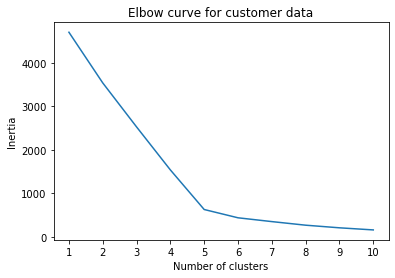

In [36]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [41]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_crypto_pca1)

# Predict clusters
predictions = model.predict(df_crypto_pca1)
print(predictions)

[2 2 2 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 2 2 0
 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 0 0 0 2 0 0 2 0 2 2 2 0 0 0 2 2 2 2 2 0
 0 0 2 2 0 2 0 2 2 0 0 0 0 2 2 0 2 0 0 2 2 0 2 2 0 0 2 2 0 2 2 0 2 0 2 0 2
 0 2 2 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 0 0 2 0 2 0 0 2 0 2 0 2 2 0 0 2 0 0 2
 2 0 2 0 2 2 2 0 0 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 0 2 0
 2 2 0 2 0 2 0 2 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 2 0 2 2 0 2 0 0 2 0 0 2 0 2 2 2 0 2 2 0
 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 0 2 0 0 0 0 2 0 2 2 0 2 0 0 0 2 0 2 0 0 0
 2 0 2 0 2 2 2 0 2 0 0 0 0 0 2 2 0 2 2 2 0 2 0 2 0 2 0 2 2 2 2 0 2 2 0 2 2
 2 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 0 2 0 0 0 2 0 0 2 2 2 0 0 0 2 2 2
 0 0 2 0 0 0 0 2 1 2 0 0 0 2 2 2 2 2 2 0 0 0 0 2 2 2 0 2 0 2 2 2 2 0 2 2 0
 2 2 0 0 2 0 2 0 0 0 0 2 2 0 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 0 2 0 0 0 0
 2 2 2 2 0 2 2 0 2 2 0 1 0 2 0 0 2 2 0 2 0 0 2 0 0 2 0 2 0 2 2 0 2 2 2 2 2
 0 0 0 2 2 2 0 2 0 2 0 2 

In [45]:
model = KMeans(n_clusters=3 , random_state=1)
# Fit the model
model.fit(df_crypto_pca1)
# Predict clusters
k_3 = model.predict(df_crypto_pca1)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = df_crypto_pca1.copy()
clustered_df['Class'] = k_3
clustered_df = pd.concat([clustered_df,crypto_df , CoinName] , axis=1)
clustered_df.head(10)

,PC 1,PC 2,PC 3,PC4,Class,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,CoinName
0,-0.335851,1.024287,-0.522016,0.013971,0.0,Scrypt,PoW/PoS,4.199995e+01,42,42 Coin
1,-0.319191,1.024440,-0.522288,0.013928,0.0,NaN,NaN,NaN,NaN,404Coin
2,2.294537,1.694150,-0.702300,0.023758,0.0,Scrypt,PoW/PoS,1.055185e+09,532000000,EliteCoin
3,-0.150243,-1.294511,0.174782,-0.031341,0.0,NaN,NaN,NaN,NaN,Bitcoin
4,-0.152136,-2.034129,0.338793,0.009346,0.0,NaN,NaN,NaN,NaN,Ethereum
5,-0.164549,-1.143765,0.014089,0.000606,0.0,X13,PoW/PoS,2.927942e+10,314159265359,Litecoin
6,-0.391395,1.231777,-0.550939,0.024278,0.0,NaN,NaN,NaN,NaN,Dash
7,-0.145994,-2.227302,0.450487,-0.020668,0.0,SHA-256,PoW,1.792718e+07,21000000,Monero
8,-0.150578,-2.034226,0.338780,0.009347,0.0,Ethash,PoW,1.076842e+08,0,Ethereum Classic
9,-0.165227,-1.978800,0.366935,0.001628,0.0,Scrypt,PoW,6.303924e+07,84000000,ZCash


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [47]:
# Creating a 3D-Scatter with the PCA data and the clusters
clustered_df.hvplot.scatter(
    x="PC 1",
    y="PC 2" ,
    by='Class',
    hover_cols=["CoinName"] ,
    title = "PC 1&2 Clusters"
) + clustered_df.hvplot.scatter(
    x="PC 1",
    y="PC 3" ,
    by='Class',
    hover_cols=["CoinName"],
    title = "PC 1&3 Clusters"
) + clustered_df.hvplot.scatter(
    x="PC 2",
    y="PC 3" ,
    by='Class',
    hover_cols=["CoinName"],
    title = "PC 2&3 Clusters"
)

:Layout
   .NdOverlay.I   :NdOverlay   [Class]
      :Scatter   [PC 1]   (PC 2,CoinName)
   .NdOverlay.II  :NdOverlay   [Class]
      :Scatter   [PC 1]   (PC 3,CoinName)
   .NdOverlay.III :NdOverlay   [Class]
      :Scatter   [PC 2]   (PC 3,CoinName)

In [56]:
fig = px.scatter_3d(
    clustered_df, 
    x="PC 1", 
    y="PC 2", 
    z="PC 3", 
    color="Class", 
    symbol="Class", 
    hover_name="CoinName", 
    hover_data=["Algorithm"])
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [57]:
# Print the total number of tradable cryptocurrencies.
tradable = clustered_df.hvplot.table(columns=['CoinName','Algorithm','ProofType','TotalCoinSupply',
                                               'TotalCoinsMined', 'Class'], sortable=True, selectable=True)
tradable

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [58]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaled_df = MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])
scaled_df

array([[4.20000000e-11, 0.00000000e+00],
       [           nan,            nan],
       [5.32000000e-04, 1.06585544e-03],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [59]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data = scaled_df, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df = pd.concat([plot_df, clustered_df['CoinName']], axis=1)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df = pd.concat([plot_df, clustered_df['Class']], axis=1)

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
0,4.200000e-11,0.000000,42 Coin,0.0
1,NaN,NaN,404Coin,0.0
2,5.320000e-04,0.001066,EliteCoin,0.0
3,NaN,NaN,Bitcoin,0.0
4,NaN,NaN,Ethereum,0.0
5,3.141593e-01,0.029576,Litecoin,0.0
6,NaN,NaN,Dash,0.0
7,2.100000e-05,0.000018,Monero,0.0
8,0.000000e+00,0.000109,Ethereum Classic,0.0
9,8.400000e-05,0.000064,ZCash,0.0


In [60]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x='TotalCoinsMined',
    y='TotalCoinSupply',
    hover=['CoinName'],
    by='Class')

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)